## Reinforcement Learning Task

For this task you will be required to solve a classic reinforcement learning problem: the [Multi-Armed Bandit problem](https://en.wikipedia.org/wiki/Multi-armed_bandit). 

In order to understand the Multi-Armed Bandit problem, imagine that you are in a casio facing multiple slot machines (let's say 10) in a row. Each of these slot machines allow you to play for free and has a maximum payout of 10 dollars. This means that each slot machine is guaranteed to give you a reward between 0 and 10 dollars. Each slot machine has a different average payout, and you have to figure out which one gives the most average reward so that you can maximise your reward in the shortest time possible. 

One way to do this would be to favour machines that had a good history of rewards relative to the number of times you pulled that machine. Chances are, however, that you wouldn’t just stick to one machine. You would probably also pull each of the machines a couple of times to get an idea of how each one behaved. In other words, would use a strategy  that is a mix of:

* Exploring: trying out different machines; after all, how are you supposed to know which machine is the “best” if you don’t give each one a shot?

* Exploiting: given the history of each machine, maximise your profit by picking the one with the best proportion of rewards to pulls.

Choosing the right mix of exploration vs. exploitation is a difficult balance to achieve. Exploit too much, and you might miss out on the real best machine. Explore too much, and you’ll waste turns on subpar machines.


## ϵ (epsilon)-greedy algorithm

Different algorithms aimed at solving the Multi-Armed Bandit problem go about balancing exploration and exploitation in different ways. A famous approach to solving this problem is the ϵ (epsilon)-greedy algorithm. In "greedy" experiments, the lever with highest known payout is always pulled except when a random action is taken. A randomly chosen arm is pulled a fraction ϵ of the time. The other 1-ϵ of the time, the arm with highest known payout is pulled.

The epsilon greedy strategy, essentially leaves this problem up to the user to solve by having them define a constant ϵ . ϵ  is then used by the algorithm in the following way:

* Choose a random machine to pull with probability = ϵ.
* Choose the best machine to pull with probability = 1 - ϵ.

The algorithm defines the "best" machine very simply; it is just the one with the highest experimental mean. The experimental mean is calculated as the sum of the rewards from that machine divided by the number of times that machine has been pulled.


## Exercise

Complete the code below.

---


As always, we firstly need to import the necessary libraries and modules required to implement the algorithm.

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(5)

For this task we will be solving the 10-armed bandit problem. We therefore create a numpy array, arms, of length n filled with random floats that can be understood as probabilities of action of that arm. We choose an epsilon value of 0.1.

In [2]:
n = 10
arms = np.random.rand(n)
eps = 0.1 # probability of exploration action

We now need to create a reward function. In this function, for each arm, you need to run a loop of 10 iterations, and generate a random float every time. If this random number is less than the probability of that arm, you'll add a 1 to the reward. After all iterations, you should have a value between 0 to 10.

In [3]:
def reward(prob):
    reward = 0
    # Complete this function
    
    for j in range(10):
        randomfloat = np.random.ranf(1)
        if randomfloat < prob:
            reward+=1
    return reward

In [4]:
a = [reward(j) for j in arms]
a

[2, 8, 4, 8, 5, 4, 8, 7, 2, 1]

We now initialise a memory array which has 1 row defaulted to random action index.

In [5]:
av = np.array([np.random.randint(0,(n+1)), 0]).reshape(1,2) #av = action-value

Next, we define the bestArm function. This function is your greedy strategy of choosing the best arm so far. This function accepts a memory array that stores the history of all actions and their rewards. It is a 2 x k matrix where each row is an index reference to your arms array (1st element), and the reward received (2nd element). For example, if a row in your memory array is [2, 8], it means that action 2 was taken (the 3rd element in our arms array) and you received a reward of 8 for taking that action.

In [10]:
def bestArm(a):
    bestArm = 0 #default to 0
    bestMean = 0
    # Complete this function
    for u in a:
        #calc. avg. reward
        avg = np.mean(a[np.where(a[:,0] == u[0])][:, 1])
        #compare bestMean and avg. should bestMean be less than avg =>
        #update bestMean to avg and set bestArm to u[0]
        if bestMean < avg: 
            bestMean = avg
            bestArm = u[0]
    return bestArm

Finally we can create the main loop for each play. Let's play it 500 times and display a matplotlib scatter plot of the mean reward against the number of times the game is played.

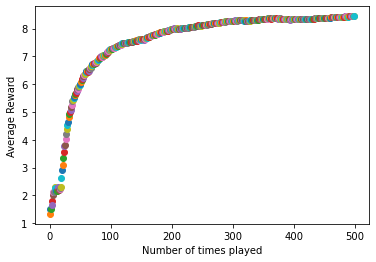

In [12]:
for i in range(500):
    if random.random() > eps: # exploitation action
        # Complete this code
        choice = bestArm(av)
        thisAV = np.array([[choice, reward(arms[choice])]])
        av = np.concatenate((av, thisAV), axis=0)
    else: # exploration action
        # Complete this code
        choice = np.where(arms == np.random.choice(arms))[0][0]
        thisAV = np.array([[choice, reward(arms[choice])]]) #choice, reward
        av = np.concatenate((av, thisAV), axis=0) 
        
    # Calculate the mean reward
    runningMean = np.mean(av[:,1])
    # Plot the mean reward against the number of times the game is played
    plt.scatter(i, runningMean)
    plt.xlabel('Number of times played')
    plt.ylabel('Average Reward')

If you have implemented the algorithm correctly, you should see that your agent learns to choose the arm which gives it the maximum average reward after several iterations of gameplay. 